In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import numpy as np

In [78]:
from Model import ReferenceDependenceClass

In [79]:
model = ReferenceDependenceClass()

In [80]:
from consumption_saving import *

In [81]:
value_function_employment(model.par)


In [82]:
print(model.par.V_e_t_a)

[[-0.05931658 -0.05610536 -0.0068148   0.04220078  0.08892568  0.13356447
   0.1762955   0.21727517  0.25664141  0.29451646  0.33100919  0.36621696
   0.40022718  0.43311865  0.46496263  0.49582379  0.52576099  0.55482794
   0.58307381  0.61054372]
 [-0.05931658 -0.05610536 -0.0068148   0.04220078  0.08892568  0.13356447
   0.1762955   0.21727517  0.25664141  0.29451646  0.33100919  0.36621696
   0.40022718  0.43311865  0.46496263  0.49582379  0.52576099  0.55482794
   0.58307381  0.61054372]
 [-0.05931658 -0.05610536 -0.0068148   0.04220078  0.08892568  0.13356447
   0.1762955   0.21727517  0.25664141  0.29451646  0.33100919  0.36621696
   0.40022718  0.43311865  0.46496263  0.49582379  0.52576099  0.55482794
   0.58307381  0.61054372]
 [-0.05931658 -0.05610536 -0.0068148   0.04220078  0.08892568  0.13356447
   0.1762955   0.21727517  0.25664141  0.29451646  0.33100919  0.36621696
   0.40022718  0.43311865  0.46496263  0.49582379  0.52576099  0.55482794
   0.58307381  0.61054372]
 [-0

In [83]:
s = solve_search_and_consumption(model.par)[0]

0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888888889
0.3388888888

In [84]:
s=s[:,0]

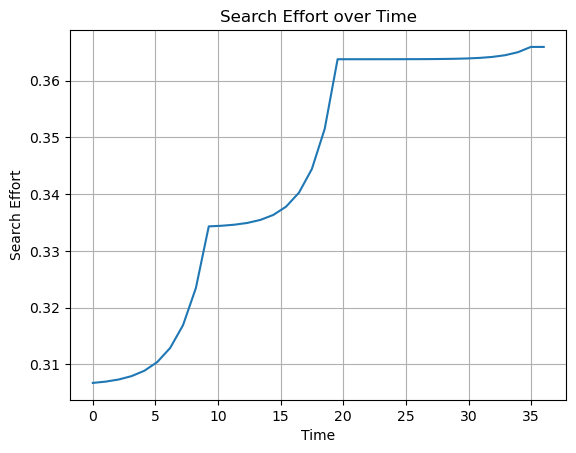

In [85]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, s)
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()
